In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

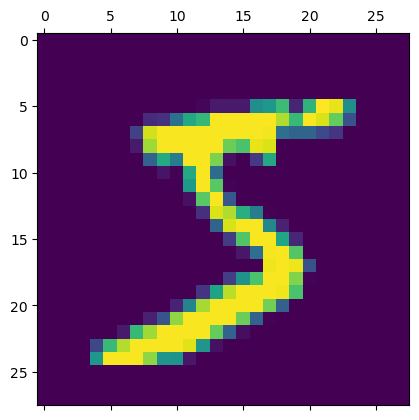

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

In [11]:
#Now our data is 2D matrix data and we want only 1D arrays to feed our Neural Network and hence we must flatten
X_train.shape

(60000, 28, 28)

In [19]:
#Scaling our values for better accuracy
X_train=X_train/255
X_test=X_test/255

In [20]:
# 60000 28 X 28 images are now reshaped to 28*28=784 size array
X_train_flat=X_train.reshape(len(X_train),28*28)

In [21]:
X_train_flat.shape

(60000, 784)

In [22]:
X_test_flat=X_test.reshape(len(X_test),28*28)

In [23]:
#Creating Neural Network
model= keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
#Optimizer allows us to reach global minima during backpropagtion efficiently
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flat,y_train,epochs=5)


/Users/gnsaivarun/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 272us/step - accuracy: 0.8088 - loss: 0.7218
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 269us/step - accuracy: 0.9141 - loss: 0.3070
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 267us/step - accuracy: 0.9193 - loss: 0.2865
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - accuracy: 0.9252 - loss: 0.2684
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - accuracy: 0.9270 - loss: 0.2639


In [24]:
model.evaluate(X_test_flat,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - accuracy: 0.9147 - loss: 0.3004


[0.26556915044784546, 0.9254999756813049]

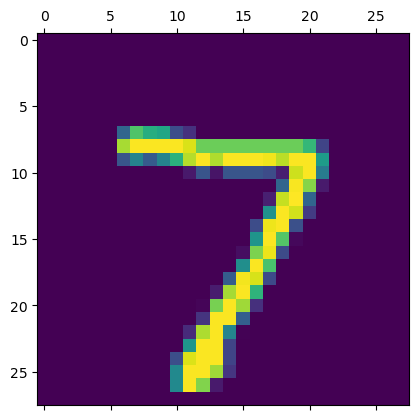

In [27]:
plt.matshow(X_test[0])

In [25]:
y_pred=model.predict(X_test_flat)
y_pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step


array([1.5662627e-02, 3.3345253e-07, 5.7495449e-02, 9.6128649e-01,
       2.7432283e-03, 9.1831066e-02, 1.8018345e-06, 9.9975675e-01,
       7.2820403e-02, 6.0910195e-01], dtype=float32)

In [28]:
np.argmax(y_pred[0])

7

In [29]:
#Converting predicted values into y_test format
y_pred_label=[np.argmax(i) for i in y_pred]
y_pred_label[:5]

[7, 2, 1, 0, 4]

In [32]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 953,    0,    2,    2,    1,    6,    9,    3,    3,    1],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   3,    9,  928,   15,    9,    3,   13,   12,   37,    3],
       [   2,    0,   18,  931,    1,   19,    4,   10,   17,    8],
       [   1,    1,    4,    1,  926,    0,   10,    4,   10,   25],
       [   7,    3,    4,   38,   12,  766,   17,    8,   32,    5],
       [   7,    3,    6,    1,    7,    9,  921,    2,    2,    0],
       [   1,    5,   21,    9,    9,    0,    0,  949,    2,   32],
       [   4,    7,    7,   24,    9,   25,   10,   11,  870,    7],
       [   9,    7,    2,   13,   41,    6,    0,   23,    8,  900]],
      dtype=int32)>

Text(33.22222222222222, 0.5, 'Actual')

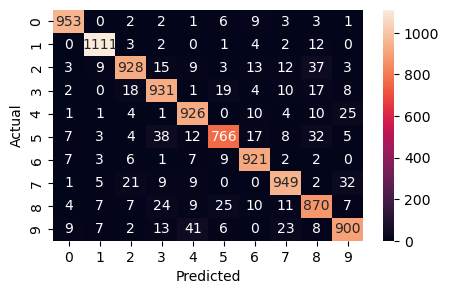

In [36]:
import seaborn as sns
plt.figure(figsize=(5,3))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [37]:
#Creating Neural Network with hidden layer
model= keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    

])
#Optimizer allows us to reach global minima during backpropagtion efficiently
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flat,y_train,epochs=5)


/Users/gnsaivarun/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 580us/step - accuracy: 0.8706 - loss: 0.4495
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 544us/step - accuracy: 0.9604 - loss: 0.1341
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 535us/step - accuracy: 0.9730 - loss: 0.0927
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 569us/step - accuracy: 0.9799 - loss: 0.0675
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 516us/step - accuracy: 0.9832 - loss: 0.0539


In [38]:
model.evaluate(X_test_flat,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.9723 - loss: 0.0942


[0.08155453205108643, 0.9757999777793884]

In [39]:
y_pred=model.predict(X_test_flat)
y_pred_label=[np.argmax(i) for i in y_pred]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_label)
cm


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    0,    1,    3,    4,    1,    4,    0],
       [   0, 1123,    3,    1,    0,    2,    2,    1,    3,    0],
       [   5,    2,  998,    6,    0,    0,    3,    6,   12,    0],
       [   0,    0,    2,  989,    0,    6,    0,    5,    3,    5],
       [   1,    0,    7,    0,  945,    2,    6,    2,    1,   18],
       [   2,    0,    0,    4,    0,  880,    3,    1,    1,    1],
       [   3,    2,    0,    1,    1,   12,  936,    0,    3,    0],
       [   1,    3,   14,    1,    0,    0,    1,  996,    5,    7],
       [   6,    0,    3,    3,    3,    3,    2,    4,  946,    4],
       [   1,    3,    0,    7,    8,    4,    2,    2,    3,  979]],
      dtype=int32)>

Text(33.22222222222222, 0.5, 'Actual')

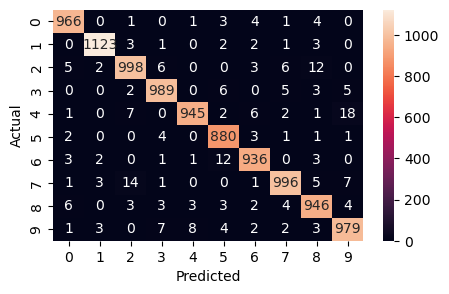

In [40]:
import seaborn as sns
plt.figure(figsize=(5,3))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [42]:
#Suppose we dont want to flatten our input Keras has inbuilt api for that

model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    

])
#Optimizer allows us to reach global minima during backpropagtion efficiently
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 599us/step - accuracy: 0.8703 - loss: 0.4641
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 554us/step - accuracy: 0.9636 - loss: 0.1245
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 541us/step - accuracy: 0.9748 - loss: 0.0833
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 617us/step - accuracy: 0.9815 - loss: 0.0622
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 560us/step - accuracy: 0.9853 - loss: 0.0478
